# 학습 목표
컴퓨터가 이미지 처리 하는 방법을 배우고 이미지를 처리하는 신경망 구현하기

# 목차
- CNN 기초
- CNN 모델 구현하기
- RestNet으로 컬러 데이터셋에 적용하기

1960년대에 신경과학자인 데이비드 휴벨과 토르스텐 비젤이 고양이에게 간단한 이미지들을 보여주고 뇌가 어떻게 반응하는지 살폈다

그 결과 서로 비슷한 이미지들은 고양이 뇌의 특정 부위를 지속적으로 자극하고, 서로 다른 이미지는 서로 다른 부위를 자극한다는 사실을 발견함.

-> 이미지의 각 부분에 뇌의 서로 다른 부분이 반응하여 전체 이미지를 인식!

-> 이미지가 머리에 들어올 때 **특징을 추출하는 부분**이 있다.

-> **CNN**(Convolutional Neural Network)


**CNN** : 합성곱 신경망. 이미지와 비디오 같은 **영상 인식에 특화**.

병렬 처리가 쉬워 대규모 서비스에 적용 가능. 최근에는 이미지뿐 아니라자연어 처리, 추천 시스템에도 응용됨.

### 5.1 CNN 기초

1. 컴퓨터가 어떤 식으로 이미지를 학습하는가 자세히 알아보기
2. 컨볼루션이 무엇인지
3. 이미지 특징을 추출하는데 사용하는 컨볼루션 계층 몇 가지 알아보기

#### 5.1.1 컴퓨터가 보는 이미지


[이미지 출처](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721)

![우리가 보는 이미지 vs 컴퓨터가 보는 이미지_1](https://github.com/kjsoo-1010/pytorch_deeplearning/blob/main/5_computer_image.png?raw=true)

왼쪽이 우리가 보는 이미지이면, 오른쪽이 컴퓨터가 인식하는 이미지이다.

![우리가 보는 이미지 vs 컴퓨터가 보는 이미지_2](https://github.com/kjsoo-1010/pytorch_deeplearning/blob/main/5_computer_image2.png?raw=true)

우리는 신경망에 이 이미지를 인식시키기 위해서 array 형태로 만들어야한다.

당장 18픽셀짜리만해도 이렇게 수가 많은데, 실제 사용되는 고화질 이미지를 생각하면 데이터 개수는 100만개가 훌쩍 넘고, 원활한 학습을 위해 이미지 처리(크기 조절, 좌우 대칭, 위치 변환 등)을 모두 거쳐 학습시키는 것은 사실상 불가능하다.

#### 5.1.2 컨볼루션

목적 : 인간처럼 계층적으로 인식할 수 있도록 단계마다 이미지의 특징을 추출하는 것.

- **Convolution** : 합성곱. 필터를 적용할 때 이미지 왼쪽 위에서 오른쪽 밑까지 밀어가며 곱하고 더하는 과정.

- **CNN** = 이미지를 추출하는 필터를 학습함. 필터가 하나의 신경망.
- **Convolution Neural Network** : 컨볼루션을 하는 인공 신경망.

라고 책에서 적혀있는데 사실 잘 와닿지 않아 좀 더 찾아봤다.

![Convolution](https://github.com/kjsoo-1010/pytorch_deeplearning/blob/main/5_CNN.png?raw=true)

[출처 및 참고 링크](https://talkingaboutme.tistory.com/entry/DL-Convolution%EC%9D%98-%EC%A0%95%EC%9D%98)

입력 이미지가 들어왔을 때, Feature 를 감지할 수 있는 Detector가 존재한다.
이 Detector는 Input Image의 모든 영역을 훑으면서 특정 Feature를 뽑고, 이를 바탕으로 해당 입력에 대한 Feature Map을 그리게 된다.

![합성곱 처리 절차](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)
출처: http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution

그럼 이 Feature Map 은 Input Image와 비교하면 크기가 작아졌기 때문에 이미지 비교 시 속도가 빨라진다. 

속도가 빠른 만큼 원래 정보가 소실된다고 볼 수 있지만, 모든 pixel을 비교하는 게 아닌 **특징을 추출**하는 작업이기 때문에 그렇다. 

그러니까 Feature Detector(Kernel, Filter라고도 표현함)들을 갖고 연산을 하여 이미지의 특징을 추출하는 과정 = Convolution 이라 할 수 있겠다.

#### 5.1.3 CNN 모델
CNN 모델은 `컨볼루션 계층`(Convolution layer), `풀링 계층`(Pooling layer), `일반적인 인공신경망 계층`(특징들을 모아 최종 분류하는 곳)으로 구성되어있다.

- 컨볼루션 계층 : 이미지의 특징을 추출하는 역할.
- 풀링 계층 : 여러 특징 중 가장 중요한 특징 하나를 골라냄.

컨볼루션 계층만으로 구성된 모델도 만들 수 있다.

**컨볼루션** 연산은 이미지를 겹치는 매우 작은 조각으로 쪼개어 필터 기능을 하는 작은 신경망에 적용하는데, 이 매우 작은 조각을 **컨볼루션 필터** 혹은 **커널**이라고 한다. 위 gif에서 노란색 부분을 의미한다. 3x3 칸이 한 칸씩(stride = 1) 움직이며 특징을 추출한다. 

**풀링** 계층 : 추출한 특징을 값 하나로 추려서 Feature Map의 크기를 줄여주고 중요 특징을 강조하는 역할.

풀링 역시 일종의 컨볼루션 연산. 필터가 지나갈 때마다 픽셀 묶어서 평균이나 최댓값을 가져오는 간단한 연산으로 이루어짐.

![풀링 계층](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99A50F395AAD46301B)
출처 : https://kolikim.tistory.com/54

2x2 최대 풀링을 stride 2로 처리하는 과정. 보통 풀링 윈도우 크기와 스트라이드는 같은 값으로 설정한다.


CNN은 사물 위치가 조금만 치우쳐도 인식하지 못하던 인공 신경망의 문제를 **이미지 전체에 필터를 적용**해 **특징을 추출**하는 방식으로 해결한다.

또한, 일반 인공신경망에 비해 필터만 학습하면 되기 때문에 훨씬 계산량이 적다.

### 5.2 모델 구현하기
이번 예제에서는 다음과 같다.

`컨볼루션` -> `풀링` -> `컨볼루션` -> `드롭아웃` -> `풀링` -> `신경망` -> `드롭아웃` -> `신경망`

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [3]:
# 하이퍼파라미터인 epoch 와 batch 사이즈 정해주기
EPOCHS = 40
BATCH_SIZE = 64

In [4]:
# 학습용, 테스트용 데이터셋 불러오기
# transforms를 이용한 전처리는 파이토치 텐서화, 정규화만 진행
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                         train = True,
                         download = True,
                         transform = transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize((0.1307, ), (0.3081,))
                         ])),
    batch_size = BATCH_SIZE, shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                         train = False,
                         download = True,
                         transform = transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize((0.1307, ), (0.3081, ))
                         ])),
    batch_size = BATCH_SIZE, shuffle = True
)

> 찾아 보기 : 갑자기 저번에도 데이터 불러올 때 `transforms.Normalize((0.1307,), (0.3081,))`을 집어넣었는데 이 숫자가 뭘 의미하는지 궁금해서 찾아봤다.
> 
> Normalize 할 때 mean, std 값을 넣어준다는데 실제 출력을 해보니 값이 다르게 나왔다. 
>
> 같은 고민을 한 사람 링크 : https://github.com/keon/3-min-pytorch/issues/26
> FashionMNIST 말고 그냥 MNIST 는 1307, 3081이 나온다.

In [10]:
tmp_transform = transforms.Compose([transforms.ToTensor()])
tmp_trainset = datasets.FashionMNIST('./data', train = True, download = True, transform = tmp_transform)
print(list(tmp_trainset.train_data.size()))
print(tmp_trainset.train_data.float().mean()/255)
print(tmp_trainset.train_data.float().std()/255)

[60000, 28, 28]
tensor(0.2860)
tensor(0.3530)


In [12]:
tmp_transform = transforms.Compose([transforms.ToTensor()])
tmp_trainset = datasets.MNIST('./data', train = True, download = True, transform = tmp_transform)
print(list(tmp_trainset.train_data.size()))
print(tmp_trainset.train_data.float().mean()/255)
print(tmp_trainset.train_data.float().std()/255)

[60000, 28, 28]
tensor(0.1307)
tensor(0.3081)


다시 돌아와서, 지금 만들 CNN 모델 커널 크기 = 5, 컨볼루션 계층 = 2개.

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Conv2D(입력 채널 수, 출력 채널 수)
        # 흑백이라 색상 채널이 1개 뿐.
        # 1개 받아서 10개의 특징 맵 생성하기
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        # 10개 받아서 20개 생성하기
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        
        #  컨볼루션 결과로 나온 출력값에 드롭아웃 해주기.
        # 이번엔 함수 사용하지 않고 nnDropout2d 모듈 사용해서 인스턴스 만들어보기.
        self.drop = nn.Dropout2d()
        
        # 일반 신경망
        self.fc1 = nn.Linear(320, 50) # 50은 그냥 임의로 한거임. 
        self.fc2 = nn.Linear(50, 10) # 10개로 분류할거니까
    
    # 입력부터 출력까지 데이터가 지나가는 길 만들기
    def forward(self, x):
        # 컨볼루션 계층 거치고, 맥스 풀링 거치게 하기.
        # 맥스 풀링 후 relu 활성화 함수 거치기
        x = F.relu(F.max_pool2d(self.conv1(x), 2)) # 2 = 커널 크기
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        
        # 일반 신경망은 1차원의 입력을 받기 때문에 펴주야함.
        x = x.view(-1, 320)
        
        # 이제 특징들은 다 추출했으니까, 얘를 받아 분류하는 신경망 계층 구성.
        x = F.relu(self.fc1(x)) # relu 거치고
        x = self.drop(x, training = self.training) # 드롭아웃 해주고
        x = self.fc2(x)
        return x

#### **320인 이유**
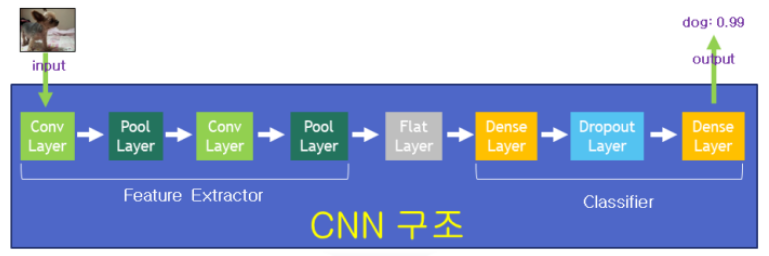

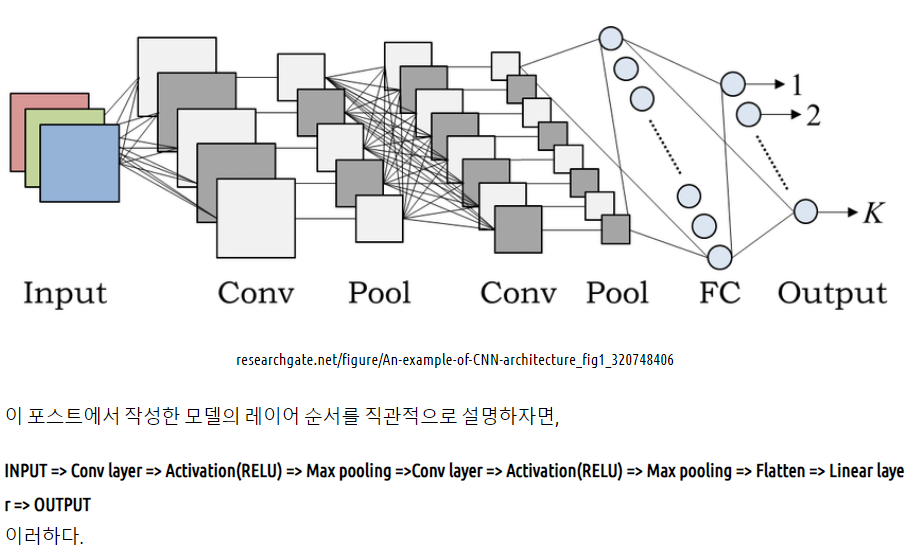

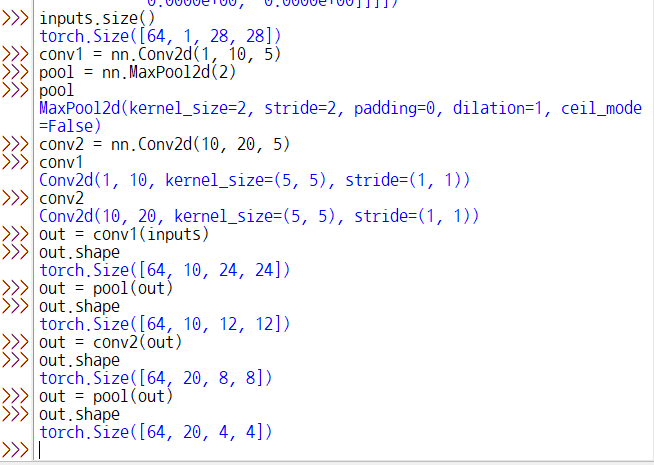
이래서 320(=20 * 4 * 4)개임.

참고 링크 : https://www.youtube.com/watch?v=wQtkdq3tmJ8, https://team00csduck.tistory.com/232


In [19]:
# 모델 인스턴스 생성
model = Net().to(DEVICE)

# 최적화 알고리즘 = optim.SGD
# momentum = 미분 그래프가 3차 이상의 그래프라 최소점이 2개 이상 생기는 경우
# SGD 에 이전의 이동값을 고려하도록 설계함. (momentum = 관성)
# 지역 최소값에 도달하더라도 앞으로 나아가서 지역 최소값을 탈출할 수 있도록 설정.
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

여기부터는 4챕터에서 한 것과 같다.

1. 모델을 train 모드로 하고
2. 데이터셋에서 배치 가져와 모델에서 출력값 뽑고
3. 오차 함수를 이용하여 모델 출력값과 정답 사이 오찻값 계산
4. 역전파 알고리즘 실행해주는 backward()로 기울기 계산해서
5. 최적화 함수 optimizer.step()으로 구한 기울기값으로 모델 학습 파라미터 갱신

In [23]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 200 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")
            
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            
            # 배치 오차를 합산
            test_loss += F.cross_entropy(output, target,
                                        reduction = 'sum').item()
            
            # 가장 높은 값을 가진 인덱스가 예측값
            pred = output.max(1, keepdim = True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy


# 모델 실행
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print(f"[{epoch}] Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.342054
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.130900
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.983405
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.900529
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.922843
[1] Test Loss: 0.6519, Accuracy: 73.80%
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.627747
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.749996
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.681456
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.633254
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.727547
[2] Test Loss: 0.5595, Accuracy: 78.42%
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.643198
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.540368
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.829052
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.460759
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.670716
[3] Test Loss: 0.5023, Accuracy: 81.94%
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.522598
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.517073
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.513255


Train Epoch: 29 [38400/60000 (64%)]	Loss: 0.313866
Train Epoch: 29 [51200/60000 (85%)]	Loss: 0.495722
[29] Test Loss: 0.2988, Accuracy: 89.07%
Train Epoch: 30 [0/60000 (0%)]	Loss: 0.225682
Train Epoch: 30 [12800/60000 (21%)]	Loss: 0.283116
Train Epoch: 30 [25600/60000 (43%)]	Loss: 0.451309
Train Epoch: 30 [38400/60000 (64%)]	Loss: 0.239160
Train Epoch: 30 [51200/60000 (85%)]	Loss: 0.384241
[30] Test Loss: 0.2964, Accuracy: 89.36%
Train Epoch: 31 [0/60000 (0%)]	Loss: 0.330619
Train Epoch: 31 [12800/60000 (21%)]	Loss: 0.289595
Train Epoch: 31 [25600/60000 (43%)]	Loss: 0.229251
Train Epoch: 31 [38400/60000 (64%)]	Loss: 0.210377
Train Epoch: 31 [51200/60000 (85%)]	Loss: 0.330495
[31] Test Loss: 0.2924, Accuracy: 89.37%
Train Epoch: 32 [0/60000 (0%)]	Loss: 0.192299
Train Epoch: 32 [12800/60000 (21%)]	Loss: 0.257746
Train Epoch: 32 [25600/60000 (43%)]	Loss: 0.340462
Train Epoch: 32 [38400/60000 (64%)]	Loss: 0.306472
Train Epoch: 32 [51200/60000 (85%)]	Loss: 0.435705
[32] Test Loss: 0.2932, A

### 5.3 ResNet으로 컬러 데이터셋에 적용하기

In [3]:
EPOCHS = 300
BATCH_SIZE = 128

컬러 데이터셋은 흑백 이미지보다 복잡하기 때문에 학습을 더 많이 해야함.

흑백은 채널 수가 하나지만, 컬러는 RGB로 총 3개이며 PNG 형식의 경우 투명도도 포함해 총 4개의 채널을 가진다.

In [4]:
# 데이터 불러오기
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./.data',
                    train = True,
                    download = True,
                    transform = transforms.Compose([
                        transforms.RandomCrop(32, padding = 4),
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5),
                                            (0.5, 0.5, 0.5))
                    ])),
    batch_size = BATCH_SIZE, shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./.data',
                    train = False,
                    transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5),
                                            (0.5, 0.5, 0.5))
                    ])),
    batch_size = BATCH_SIZE, shuffle = True
)

Files already downloaded and verified


무작정 인공 신경망을 여러 개 겹친다고 학습 성능이 무한히 좋아지는 것은 아니다. 

여러 단계 신경망 거친다 -> 최초 입력 이미지 정보 소실됨.

ResNet은 이 문제를 해결하는 방안을 제시한다.

네트워크를 작은 블록인 Residual 블록으로 나누고, Residual 블록의 출력에 입력이었던 x를 더함으로써 모델을 훨씬 깊게 설계함. => 입력과 출력의 **차이**를 학습하는 것이 성능이 좋다는 가설.

Residual 블록을 BasicBlock이라는 새로운 파이토치 모듈로 정의해서 사용한다.

In [5]:
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride = 1):
        super(BasicBlock, self).__init__()
        
        # Conv2d(입력 채널 수 = in_planes, 출력 채널 수=planes)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size = 3,
                           stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(planes) # 배치 정규화
        self.conv2 = nn.Conv2d(planes, planes, kernel_size = 3,
                              stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(planes)
        
        # 입력 채널인 in_planes 를 받아,
        # self.bn2 계층의 출력 크기와 같은 planes 와 더해주는 shortcut 모듈 정의.
        # Sequential은 여러 모듈을 하나의 모듈로 묶는 역할.
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                         kernel_size = 1, stride = stride, bias = False),
                nn.BatchNorm2d(planes)
            )
        
    # 데이터 흐름
    # 입력 x -> 컨볼루션 -> 배치 정규화 -> 활성화 함수  
    # -> 입력 x를 shortcut 거쳐 planes 로 크기 같게 한 거 더하기
    # -> Relu 활성화 함수 통과 -> 최종 출력
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

`BatchNorm2d` : 배치 정규화를 수행하는 계층.

**배치 정규화** : 학습률을 너무 높게 잡을 때 기울기가 소실되거나 발산하는 증상을 예방하여 학습 과정을 안정화하는 방법.

학습 중 각 계층에 들어가는 입력을 평균과 분산으로 정규화함으로써 학습을 효율적으로 만들어준다. => 자체적으로 정규화 수행하기 때문에 드롭아웃과 같은 효과를 낸다는 장점이 있음.

둘의 차이는 드롭아웃은 학습 중 데이터 일부를 배제하여 간접적으로 과적합을 막는 방식이라면, 배치 정규화는 신경망 내부 데이터에 직접 영향을 주는 방식이다.

> 💡 참고 링크 : [Conv2d() 파라미터](https://gaussian37.github.io/dl-pytorch-conv2d/), [파이토치 공식 문서 Conv2d()](https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html#torch.nn.functional.conv2d)



**모델 만들기**
1. 이미지 받아 컨볼루션, 배치정규화 층 거치기
2. 여러 BasicBlock 층 통과
3. 평균 풀링, 신경망 거쳐 예측 출력

In [6]:
class ResNet(nn.Module):
    def __init__(self, num_classes = 10):
        super(ResNet, self).__init__()
        # self._make_layer 함수에서 각 층을 만들 때 전층 채널 출력값 기록용
        self.in_planes = 16 # layer1 입력 채널 개수 = 16 
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3,
                              stride = 1, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(16, 2, stride = 1) # 반환값 (16, 32, 32)
        self.layer2 = self._make_layer(32, 2, stride = 2) # (32, 16, 16)
        self.layer3 = self._make_layer(64, 2, stride = 2) # (64, 8, 8)
        
        # 평균 풀링으로 텐서에 있는 원소 개수 64개 -> 10개(레이블 개수)
        self.linear = nn.Linear(64, num_classes)
       
    # 여러 BasicBlock을 모듈 하나로 묶어주는 역할.
    # 반환값은 컨볼루션 계층과 마찬가지로 모듈 취급하면 된다.
    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            # BasicBlock 생성함.
            # layer1 에서는 16 -> 16 인 BasicBlcok 2개
            # layer2 에서는 16 -> 32 인 BasicBlock 1개, 32 -> 32 인 블록 1개
            # layer3 에서는 32 -> 32 1개, 32 -> 64 1개
            
            # 여기서 16 -> 32 와 32 -> 64 가 이저너 입력을 중간층에 더해 이미지 맥락 보존 역할.
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)
    
    
    # 데이터 흐름
    # 1. 입력 들어오면 (컨볼루션, 배치정규화, 활성화함수) 통과
    # 2. 정의해둔 BasicBlock 갖고 있는 layer1, 2, 3 통과
    # 3. 나온 값에 평균 풀링 -> 마지막 계층 분류 결과 출력
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 8)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [7]:
# 학습률 감소 기법 사용
# 학습 진행하면서 최적화 함수의 학습률을 점점 낮춰서 더 정교화게 최적화 함.
model = ResNet().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr = 0.1,
                     momentum = 0.9, weight_decay = 0.0005)

# 이폭마다 호출되며 step_size가 50이니, 50번 호출될 때 학습률에 gamma(=0.1)값을 곱한다.
# 0.1로 시작한 학습률은 50 이폭 후에 0.01이 됨.
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 50, gamma = 0.1)

print(model)

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

In [ ]:
# 학습 및 테스트
# 앞과 다른 점 : scheduler.step() 함수로 학습률 낮춰주는 단계 추가

def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
    
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            
            test_loss += F.cross_entropy(output, target, reduction = "sum").item()
            pred = output.max(1, keepdim = True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy


for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    scheduler.step()
    test_loss, test_accuracy = test(model, test_loader)
    
    print(f"[{epoch}] Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")